# Вторая часть технологического практикума #
### Островский Алексей 316 группа ###

### Подготовительные работы ###

In [ ]:
%pip install -r requirements.txt
%load_ext rpy2.ipython

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels.api as stm
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')
np.random.seed(1)

In [ ]:
%%R
# R
# Выключаю вывод предупреждающих сообщений warning
oldw <- getOption("warn")
options(warn = -1)

install.packages("dplyr")
install.packages("Hmisc")
install.packages("ggplot2")
install.packages("highcharter")
install.packages("Leaflet")
install.packages("RColorBrewer")
install.packages("Plotly")
install.packages("sunburstR")
install.packages("RGL")
install.packages("dygraphs")
install.packages("outliers")
library(outliers)
install.packages("mice")
library(mice)
install.packages("corrplot")
library(corrplot)
install.packages('car')
library(car)
install.packages("ISwR")
library(ISwR)

packages <- c('ggplot2', 'dplyr', 'tidyr', 'tibble')
library(tidyr)
library(tibble)

install.packages("nortest")
library(nortest)
install.packages("ggpubr")
set.seed(31600) # устанавливаю значение рандома по умолчанию

filter_data = function(data_frame, column, value){
  dplyr::filter(data_frame, !!as.symbol(column) == value)
}


### Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99) ###

##### a) Стьюдента, включая односторонние варианты, когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних значений больше (или меньше) другого. Реализовать оценку мощности критериев при заданном объеме выборки или определения объема выборки для достижения заданной мощности; #####

In [323]:
# first position = mu, second position = sigma
norm_0 = np.random.normal(0, 5, size=500)
norm_5 = np.random.normal(5, 5, size=500)
norm_10 = np.random.normal(10, 5, size=500)

In [324]:
%%R

norm_0 <- rnorm(500, mean = 0, sd = 5)
norm_5 <- rnorm(500, mean = 5, sd = 5)
norm_10 <- rnorm(500, mean = 10, sd = 5)


Будем смотреть нормальные распределения с одинаковой выборкой и одинаковой дисперсией. Это важно, так как ttest_ind работает при этих условиях, иначе в случае несовпадения дисперсий будет использоваться t-критерий Уэлча - тест, основанный на распределении Стьюдента и предназначенный для проверки статистической гипотезы о равенстве математических ожиданий случайных величин, имеющих необязательно равные известные дисперсии. Является модификацией t-критерия Стьюдента.

In [325]:
confidence_level = 0.90
print(stats.ttest_ind(norm_5, norm_10, equal_var=True, alternative='two-sided').pvalue > 1 - confidence_level)
print(stats.ttest_ind(norm_0, norm_5, equal_var=True, alternative='greater').pvalue > 1 - confidence_level)
print(stats.ttest_ind(norm_0, norm_5, equal_var=True, alternative='less').pvalue > 1 - confidence_level)

False
True
False


In [326]:
%%R
print(t.test(norm_0, mu = 10, conf.level = 0.9))
print(t.test(norm_5, mu = 5, conf.level = 0.9))
print(t.test(norm_10, mu = 0, conf.level = 0.9))


	One Sample t-test

data:  norm_0
t = -45.729, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 10
90 percent confidence interval:
 -0.4338283  0.2920168
sample estimates:
  mean of x 
-0.07090575 


	One Sample t-test

data:  norm_5
t = 1.5052, df = 499, p-value = 0.1329
alternative hypothesis: true mean is not equal to 5
90 percent confidence interval:
 4.968678 5.691908
sample estimates:
mean of x 
 5.330293 


	One Sample t-test

data:  norm_10
t = 44.253, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
90 percent confidence interval:
  9.81650 10.57588
sample estimates:
mean of x 
 10.19619 



Нулевые гипотезы для разного вида алтернатив следующие:
* ‘two-sided’: the means of the distributions underlying the samples are unequal.
* ‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.
* ‘greater’: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

Как видно полученный p-value в каждом из тестов совпадает с проверкой на определенном уровне доверия \
Проверим аналогично оставшиеся 0.95 и 0.99

In [327]:
confidence_level = 0.95
print(stats.ttest_ind(norm_5, norm_10, equal_var=True, alternative='two-sided').pvalue > 1 - confidence_level)
print(stats.ttest_ind(norm_0, norm_5, equal_var=True, alternative='greater').pvalue > 1 - confidence_level)
print(stats.ttest_ind(norm_0, norm_5, equal_var=True, alternative='less').pvalue > 1 - confidence_level)
print(10*'-')
confidence_level = 0.99
print(stats.ttest_ind(norm_5, norm_10, equal_var=True, alternative='two-sided').pvalue > 1 - confidence_level)
print(stats.ttest_ind(norm_0, norm_5, equal_var=True, alternative='greater').pvalue > 1 - confidence_level)
print(stats.ttest_ind(norm_0, norm_5, equal_var=True, alternative='less').pvalue > 1 - confidence_level)

False
True
False
----------
False
True
False


In [328]:
%%R
print(t.test(norm_5, norm_10, alternative = 'two.sided', conf.level = 0.95))
print(t.test(norm_0, norm_5, alternative = 'greater', conf.level = 0.95))
print(t.test(norm_0, norm_5, alternative = 'less', conf.level = 0.95))

print(t.test(norm_5, norm_10, alternative = 'two.sided', conf.level = 0.99))
print(t.test(norm_0, norm_5, alternative = 'greater',conf.level = 0.99))
print(t.test(norm_0, norm_5, alternative = 'less', conf.level = 0.99))


	Welch Two Sample t-test

data:  norm_5 and norm_10
t = -15.293, df = 995.64, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.490278 -4.241511
sample estimates:
mean of x mean of y 
 5.330293 10.196188 


	Welch Two Sample t-test

data:  norm_0 and norm_5
t = -17.373, df = 997.99, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -5.913049       Inf
sample estimates:
  mean of x   mean of y 
-0.07090575  5.33029302 


	Welch Two Sample t-test

data:  norm_0 and norm_5
t = -17.373, df = 997.99, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -4.889348
sample estimates:
  mean of x   mean of y 
-0.07090575  5.33029302 


	Welch Two Sample t-test

data:  norm_5 and norm_10
t = -15.293, df = 995.64, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to

##### b)Уилкоксона-Манна-Уитни (ранговые); #####

U-критерий Манна-Уитни - это непараметрический тест нулевой гипотезы о том, что распределение, лежащее в основе выборки x, совпадает с распределением, лежащим в основе выборки y. Он часто используется как тест на разницу в местоположении между распределениями.

Возьмем равномерное распределение на разных отрезках, тогда графики их распределений достаточно просто интерпретируемы для анализа \
Нулевые гипотезы для разного вида альтернатив следующие:
* ‘two-sided’: the distributions are not equal, i.e. F(u) ≠ G(u) for at least one u.
* ‘less’: the distribution underlying x is stochastically less than the distribution underlying y, i.e. F(u) > G(u) for all u.
* ‘greater’: the distribution underlying x is stochastically greater than the distribution underlying y, i.e. F(u) < G(u) for all u.
Где F(u), G(u) - функции распределения проверяемых функций

In [329]:
uniform_1 = np.random.uniform(low=0, high=5, size=500)
uniform_2 = np.random.uniform(low=0, high=10, size=500)
uniform_3 = np.random.uniform(low=0, high=100, size=500)

In [330]:
%%R
uniform_1 <- runif(500, min = 0, max = 5)
uniform_2 <- runif(500, min = 0, max = 10)
uniform_3 <- runif(500, min = 0, max = 100)

In [331]:
confidence_level = 0.9
print(stats.mannwhitneyu(uniform_1, uniform_3, alternative='two-sided').pvalue > 1 - confidence_level)
print(stats.mannwhitneyu(uniform_2, uniform_3, alternative='greater').pvalue > 1 - confidence_level)
print(stats.mannwhitneyu(uniform_2, uniform_3, alternative='less').pvalue > 1 - confidence_level)

False
True
False


In [332]:
%%R

print(wilcox.test(uniform_1, mu = mean(uniform_3), exact = FALSE, conf.level = 0.9))
print(wilcox.test(uniform_2, mu = mean(uniform_2), exact = FALSE, conf.level = 0.9))
print(wilcox.test(uniform_3, mu = mean(uniform_1), exact = FALSE, conf.level = 0.9))


	Wilcoxon signed rank test with continuity correction

data:  uniform_1
V = 0, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 51.80704


	Wilcoxon signed rank test with continuity correction

data:  uniform_2
V = 62576, p-value = 0.988
alternative hypothesis: true location is not equal to 5.038637


	Wilcoxon signed rank test with continuity correction

data:  uniform_3
V = 125132, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 2.465377



In [333]:
confidence_level = 0.95
print(stats.mannwhitneyu(uniform_1, uniform_3, alternative='two-sided').pvalue > 1 - confidence_level)
print(stats.mannwhitneyu(uniform_2, uniform_3, alternative='greater').pvalue > 1 - confidence_level)
print(stats.mannwhitneyu(uniform_2, uniform_3, alternative='less').pvalue > 1 - confidence_level)
print(10*'-')
confidence_level = 0.99
print(stats.mannwhitneyu(uniform_1, uniform_3, alternative='two-sided').pvalue > 1 - confidence_level)
print(stats.mannwhitneyu(uniform_2, uniform_3, alternative='greater').pvalue > 1 - confidence_level)
print(stats.mannwhitneyu(uniform_2, uniform_3, alternative='less').pvalue > 1 - confidence_level)

False
True
False
----------
False
True
False


In [334]:
%%R

print(wilcox.test(uniform_1, mu = mean(uniform_3), alternative = 'two.sided', exact = FALSE, conf.level = 0.95))
print(wilcox.test(uniform_2, mu = mean(uniform_3), alternative = 'greater', exact = FALSE, conf.level = 0.95))
print(wilcox.test(uniform_2, mu = mean(uniform_3), alternative = 'less', exact = FALSE, conf.level = 0.95))

print(wilcox.test(uniform_1, mu = mean(uniform_3), alternative = 'two.sided',exact = FALSE, conf.level = 0.99))
print(wilcox.test(uniform_2, mu = mean(uniform_3), alternative = 'greater', exact = FALSE, conf.level = 0.99))
print(wilcox.test(uniform_2, mu = mean(uniform_3), alternative = 'less', exact = FALSE, conf.level = 0.99))


	Wilcoxon signed rank test with continuity correction

data:  uniform_1
V = 0, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 51.80704


	Wilcoxon signed rank test with continuity correction

data:  uniform_2
V = 0, p-value = 1
alternative hypothesis: true location is greater than 51.80704


	Wilcoxon signed rank test with continuity correction

data:  uniform_2
V = 0, p-value < 2.2e-16
alternative hypothesis: true location is less than 51.80704


	Wilcoxon signed rank test with continuity correction

data:  uniform_1
V = 0, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 51.80704


	Wilcoxon signed rank test with continuity correction

data:  uniform_2
V = 0, p-value = 1
alternative hypothesis: true location is greater than 51.80704


	Wilcoxon signed rank test with continuity correction

data:  uniform_2
V = 0, p-value < 2.2e-16
alternative hypothesis: true location is less than 51.80704



##### c) Фишера, Левене, Бартлетта, Флигнера-Килина (проверка гипотез об однородности дисперсий). #####

Реализации тетста Фишера (F-test) не удалось найти в библиотеке scipy, поэтому реализуем ее сами
$$ F = \frac{\mathrm{Var(X)}}{\mathrm{Var(Y)}} $$
Нулевая гипотеза заключается в том, что дисперсии двух выборок равны

In [335]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1) / np.var(y, ddof=1) # calculate F test statistic
    dfn = x.size - 1 #define degrees of freedom numerator
    dfd = y.size - 1 #define degrees of freedom denominator
    p = 1 - stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic
    return p

In [336]:
dnorm_0 = np.random.normal(0, 1, size=100)
dnorm_5 = np.random.normal(0, 5, size=100)
dnorm_10 = np.random.normal(0, 10, size=100)

In [337]:
%%R

dnorm_0 <- rnorm(100, mean = 0, sd = 1)
dnorm_5 <- rnorm(100, mean = 0, sd = 5)
dnorm_10 <- rnorm(100, mean = 0, sd = 10)

In [338]:
confidence_level = 0.9
print(f_test(dnorm_0, dnorm_10) > 1 - confidence_level)
confidence_level = 0.95
print(f_test(dnorm_0, dnorm_10) > 1 - confidence_level)
confidence_level = 0.99
print(f_test(dnorm_0, dnorm_10) > 1 - confidence_level)

True
True
True


In [339]:
%%R

print(var.test(dnorm_0, dnorm_10, conf.level = 0.90))
print(var.test(dnorm_0, dnorm_10, conf.level = 0.95))
print(var.test(dnorm_0, dnorm_10, conf.level = 0.99))


	F test to compare two variances

data:  dnorm_0 and dnorm_10
F = 0.012116, num df = 99, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
90 percent confidence interval:
 0.008691054 0.016890253
sample estimates:
ratio of variances 
        0.01211586 


	F test to compare two variances

data:  dnorm_0 and dnorm_10
F = 0.012116, num df = 99, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.008152056 0.018007002
sample estimates:
ratio of variances 
        0.01211586 


	F test to compare two variances

data:  dnorm_0 and dnorm_10
F = 0.012116, num df = 99, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 0.007188871 0.020419630
sample estimates:
ratio of variances 
        0.01211586 



Реализации тестов Левене, Бартлетта и Флигнера-Килина есть в библиотеке scipy, и тем более они не так чувствительны к нормальному распределению, в отличии от F теста

In [340]:
# var = npq
bin_1 = np.random.binomial(10, 0.5, size=100)
bin_2 = np.random.binomial(10, 0.2, size=100)

confidence_level = [0.90, 0.95, 0.99]
result_levene = dict()
for level in confidence_level:
    result_levene[level] = stats.levene(bin_1, bin_2).pvalue > 1 - level
print(result_levene)

result_bartlett = dict()
for level in confidence_level:
    result_bartlett[level] = stats.bartlett(bin_1, bin_2).pvalue > 1 - level
print(result_bartlett)

result_fligner = dict()
for level in confidence_level:
    result_fligner[level] = stats.fligner(bin_1, bin_2).pvalue > 1 - level
print(result_fligner)

{0.9: False, 0.95: True, 0.99: True}
{0.9: True, 0.95: True, 0.99: True}
{0.9: False, 0.95: True, 0.99: True}


In [341]:
%%R

bin_1 <- rbinom(100, 10, prob = 0.5)
bin_2 <- rbinom(100, 10, prob = 0.2)

print(leveneTest(bin_1, bin_2))
print(bartlett.test(bin_1, bin_2))
print(fligner.test(bin_1, bin_2))

Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  5  0.6235 0.6822
      94               


  there must be at least 2 observations in each group




Error in bartlett.test.default(bin_1, bin_2) : 
  there must be at least 2 observations in each group


### Исследовать корреляционные взаимосвязи в данных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла. ###

Будем исследовать дополнительный датасет, связанный с эффективностью сна

In [342]:
df = pd.read_csv('Sleep_Efficiency.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [343]:
%%R

df <- read.csv('Sleep_Efficiency.csv')
rownames(df) <- NULL

Исследуем коррелируемость Deep slepp percentage и Sleep efficiency, пользуясь коэффициентами Пирсона, Спирмена и Кендалла \
Нулевой гипотезой в данном случае является предположение, что выборки некоррелируют и нормально распредлены

In [344]:
print("Корреляция ненулевая:", stats.pearsonr(df['Deep sleep percentage'], df['Sleep efficiency'], alternative='two-sided').pvalue)
print("Корреляция положительная:", stats.pearsonr(df['Deep sleep percentage'], df['Sleep efficiency'], alternative='greater').pvalue)
print("Корреляция отрицательная:", stats.pearsonr(df['Deep sleep percentage'], df['Sleep efficiency'], alternative='less').pvalue)
stats.pearsonr(df['Deep sleep percentage'], df['Sleep efficiency']).statistic

Корреляция ненулевая: 1.4330145730238673e-96
Корреляция положительная: 7.165072865119336e-97
Корреляция отрицательная: 1.0


0.7873351005513041

In [345]:
%%R

print(cor.test(df$Deep.sleep.percentage, df$Sleep.efficiency, method = 'pearson', alternative = 'two.sided'))
print(cor.test(df$Deep.sleep.percentage, df$Sleep.efficiency, method = 'pearson', alternative = 'greater'))
print(cor.test(df$Deep.sleep.percentage, df$Sleep.efficiency, method = 'pearson', alternative = 'less'))


	Pearson's product-moment correlation

data:  df$Deep.sleep.percentage and df$Sleep.efficiency
t = 27.09, df = 450, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7495316 0.8200199
sample estimates:
      cor 
0.7873351 


	Pearson's product-moment correlation

data:  df$Deep.sleep.percentage and df$Sleep.efficiency
t = 27.09, df = 450, p-value < 2.2e-16
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.7559758 1.0000000
sample estimates:
      cor 
0.7873351 


	Pearson's product-moment correlation

data:  df$Deep.sleep.percentage and df$Sleep.efficiency
t = 27.09, df = 450, p-value = 1
alternative hypothesis: true correlation is less than 0
95 percent confidence interval:
 -1.0000000  0.8150888
sample estimates:
      cor 
0.7873351 



In [346]:
print("Корреляция ненулевая:", stats.spearmanr(df['Deep sleep percentage'], df['Sleep efficiency'], alternative='two-sided').pvalue)
print("Корреляция положительная:", stats.spearmanr(df['Deep sleep percentage'], df['Sleep efficiency'], alternative='greater').pvalue)
print("Корреляция отрицательная:", stats.spearmanr(df['Deep sleep percentage'], df['Sleep efficiency'], alternative='less').pvalue)
stats.spearmanr(df['Deep sleep percentage'], df['Sleep efficiency']).statistic

Корреляция ненулевая: 5.296071059339605e-36
Корреляция положительная: 2.6480355296698026e-36
Корреляция отрицательная: 1.0


0.5428515557610679

In [347]:
%%R

print(cor.test(df$Deep.sleep.percentage, df$Sleep.efficiency, method = 'spearman', alternative = 'two.sided'))
print(cor.test(df$Deep.sleep.percentage, df$Sleep.efficiency, method = 'spearman', alternative = 'greater'))
print(cor.test(df$Deep.sleep.percentage, df$Sleep.efficiency, method = 'spearman', alternative = 'less'))


	Spearman's rank correlation rho

data:  df$Deep.sleep.percentage and df$Sleep.efficiency
S = 7035892, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5428516 


	Spearman's rank correlation rho

data:  df$Deep.sleep.percentage and df$Sleep.efficiency
S = 7035892, p-value < 2.2e-16
alternative hypothesis: true rho is greater than 0
sample estimates:
      rho 
0.5428516 


	Spearman's rank correlation rho

data:  df$Deep.sleep.percentage and df$Sleep.efficiency
S = 7035892, p-value = 1
alternative hypothesis: true rho is less than 0
sample estimates:
      rho 
0.5428516 



In [348]:
print("Корреляция ненулевая:", stats.kendalltau(df['Deep sleep percentage'], df['Sleep efficiency'], alternative='two-sided').pvalue)
print("Корреляция положительная:", stats.kendalltau(df['Deep sleep percentage'], df['Sleep efficiency'], alternative='greater').pvalue)
print("Корреляция отрицательная:", stats.kendalltau(df['Deep sleep percentage'], df['Sleep efficiency'], alternative='less').pvalue)
stats.kendalltau(df['Deep sleep percentage'], df['Sleep efficiency']).statistic

Корреляция ненулевая: 7.617438516570207e-30
Корреляция положительная: 3.8087192582851036e-30
Корреляция отрицательная: 1.0


0.37370510201385554

In [349]:
%%R

print(cor.test(df$Deep.sleep.percentage, df$Sleep.efficiency, method = 'kendall', alternative = 'two.sided'))
print(cor.test(df$Deep.sleep.percentage, df$Sleep.efficiency, method = 'kendall', alternative = 'greater'))
print(cor.test(df$Deep.sleep.percentage, df$Sleep.efficiency, method = 'kendall', alternative = 'less'))


	Kendall's rank correlation tau

data:  df$Deep.sleep.percentage and df$Sleep.efficiency
z = 11.348, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.3737051 


	Kendall's rank correlation tau

data:  df$Deep.sleep.percentage and df$Sleep.efficiency
z = 11.348, p-value < 2.2e-16
alternative hypothesis: true tau is greater than 0
sample estimates:
      tau 
0.3737051 


	Kendall's rank correlation tau

data:  df$Deep.sleep.percentage and df$Sleep.efficiency
z = 11.348, p-value = 1
alternative hypothesis: true tau is less than 0
sample estimates:
      tau 
0.3737051 



### Продемонстрировать использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля. ###

In [350]:
obs = df['Sleep duration']
exp = [df['Sleep duration'].mean()] * df.shape[0]
print(stats.chisquare(f_obs=obs, f_exp=exp).pvalue > 0.05)

obs = df['Light sleep percentage']
exp = [df['Light sleep percentage'].mean()] * df.shape[0]
print(stats.chisquare(f_obs=obs, f_exp=exp).pvalue > 0.05)

True
False


Критерий хи-квадрат проверяет нулевую гипотезу о том, что категориальные данные имеют заданные частоты

In [351]:
%%R

print(chisq.test(df$Sleep.duration))
print(chisq.test(df$Light.sleep.percentage))


	Chi-squared test for given probabilities

data:  df$Sleep.duration
X-squared = 45.37, df = 451, p-value = 1


	Chi-squared test for given probabilities

data:  df$Light.sleep.percentage
X-squared = 4306, df = 451, p-value < 2.2e-16



Нулевая гипотеза точного теста Фишера заключается в том, что истинное отношение шансов популяций, лежащих в основе наблюдений равно единице

In [352]:
small_df = pd.get_dummies(df, columns=['Gender', 'Smoking status'], dtype=int)
female_smoke = small_df[(small_df['Gender_Female'] == 1) & (small_df['Smoking status_Yes'] == 1)].shape[0]
male_smoke = small_df[(small_df['Gender_Male'] == 1) & (small_df['Smoking status_Yes'] == 1)].shape[0]
female_nosmoke = small_df[(small_df['Gender_Female'] == 1) & (small_df['Smoking status_No'] == 1)].shape[0]
male_nosmoke = small_df[(small_df['Gender_Male'] == 1) & (small_df['Smoking status_No'] == 1)].shape[0]

table = [[female_smoke, female_nosmoke], [male_smoke, male_nosmoke]]
print(stats.fisher_exact(table).pvalue > 0.05)

False


In [353]:
%%R

small_df <- df[, -c(3, 14)]

small_df$Gender.Female <- ifelse(df$Gender == 'Female', 1, 0)
small_df$Gender.Male <- ifelse(df$Gender == 'Male', 1, 0)
small_df$Smoking.status.Yes <- ifelse(df$Smoking.status == 'Yes', 1, 0)
small_df$Smoking.status.No <- ifelse(df$Smoking.status == 'No', 1, 0)

female_smoke = nrow(small_df[(small_df$Gender.Female == 1) & (small_df$Smoking.status.Yes == 1), ])
male_smoke = nrow(small_df[(small_df$Gender.Male == 1) & (small_df$Smoking.status.Yes == 1), ])
female_nosmoke = nrow(small_df[(small_df$Gender.Female == 1) & (small_df$Smoking.status.No == 1), ])
male_nosmoke = nrow(small_df[(small_df$Gender.Male == 1) & (small_df$Smoking.status.No == 1), ])

table <- matrix(c(female_smoke, female_nosmoke, male_smoke, male_nosmoke), nrow = 2, ncol = 2, byrow = TRUE)

print(fisher.test(table))


	Fisher's Exact Test for Count Data

data:  table
p-value = 0.002865
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3583724 0.8217580
sample estimates:
odds ratio 
 0.5439744 



Нулевая гипотеза теста МакНемара утверждает, что маргинальные распределения для всех исходов совпадают

In [354]:
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(table, exact=False, correction=False).pvalue > 0.05)

False


In [355]:
%%R

print(mcnemar.test(table))


	McNemar's Chi-squared test with continuity correction

data:  table
McNemar's chi-squared = 18.598, df = 1, p-value = 1.614e-05



In [356]:
df['Age'].value_counts().sort_values()

12     1
66     1
17     1
67     1
13     1
      ..
40    17
48    17
37    18
27    19
52    19
Name: Age, Length: 61, dtype: int64

Нулевая гипотеза, проверяемая при помощи CMH-критерия, заключается в том, что между двумя анализируемыми качественными признаками нет никакой связи. Технически говоря, тестируется гипотеза о том, что отношение шансов в каждой из K таблиц сопряженности равно 1 \

In [357]:
from statsmodels.stats.contingency_tables import StratifiedTable

tables = []
ages = [40, 48, 37, 27, 52]
for age in ages:
  female_smoke = small_df[(small_df['Gender_Female'] == 1) & (small_df['Smoking status_Yes'] == 1) & (small_df['Age'] == age)].shape[0]
  male_smoke = small_df[(small_df['Gender_Male'] == 1) & (small_df['Smoking status_Yes'] == 1) & (small_df['Age'] == age)].shape[0]
  female_nosmoke = small_df[(small_df['Gender_Female'] == 1) & (small_df['Smoking status_No'] == 1) & (small_df['Age'] == age)].shape[0]
  male_nosmoke = small_df[(small_df['Gender_Male'] == 1) & (small_df['Smoking status_No'] == 1) & (small_df['Age'] == age)].shape[0]
  table = [[female_smoke, female_nosmoke], [male_smoke, male_nosmoke]]
  tables.append(table)

print(StratifiedTable(tables=tables).summary())

                   Estimate   LCB    UCB 
-----------------------------------------
Pooled odds           0.390   0.142 1.073
Pooled log odds      -0.941  -1.952 0.070
Pooled risk ratio     0.576              
                                         
                 Statistic P-value 
-----------------------------------
Test of OR=1         3.636   0.057 
Test constant OR     5.323   0.256 
                     
---------------------
Number of tables  5  
Min n            17  
Max n            19  
Avg n            18  
Total n          90  
---------------------


In [358]:
%%R

tables = c()

for (age in c(40, 48, 37, 27, 52)){
  female_smoke = nrow(small_df[(small_df$Gender.Female == 1) & (small_df$Smoking.status.Yes == 1) & (small_df$Age == age), ])
  male_smoke = nrow(small_df[(small_df$Gender.Male == 1) & (small_df$Smoking.status.Yes == 1) & (small_df$Age == age), ])
  female_nosmoke = nrow(small_df[(small_df$Gender.Female == 1) & (small_df$Smoking.status.No == 1) & (small_df$Age == age), ])
  male_nosmoke = nrow(small_df[(small_df$Gender.Male == 1) & (small_df$Smoking.status.No == 1) & (small_df$Age == age), ])

  tables = append(tables, matrix(c(female_smoke, female_nosmoke, male_smoke, male_nosmoke), nrow = 2, ncol = 2, byrow = TRUE))
}

tables <- array(tables, dim = c(2, 2, 5))

print(mantelhaen.test(dataCMH), exact=T)


	Mantel-Haenszel chi-squared test with continuity correction

data:  dataCMH
Mantel-Haenszel X-squared = 2.7385, df = 1, p-value = 0.09796
alternative hypothesis: true common odds ratio is not equal to 1
95 percent confidence interval:
 0.141986 1.073011
sample estimates:
common odds ratio 
        0.3903237 



### Проверить наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактора инфляции дисперсии. ###

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

Для построения корреляционной матрицы выберем поля целого или вещественного типа.

In [360]:
notcat = ['Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
cor_matr = df.loc[:, notcat].corr()
cor_matr

,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
Sleep duration,1.000000,-0.027467,-0.015940,-0.037304,0.004939,-0.014802,-0.046243,-0.068272
Sleep efficiency,-0.027467,1.000000,0.062362,0.787335,-0.564979,0.065082,-0.389624,0.259563
REM sleep percentage,-0.015940,0.062362,1.000000,-0.208159,-0.025332,0.060037,-0.053258,0.031768
Deep sleep percentage,-0.037304,0.787335,-0.208159,1.000000,-0.308267,0.001742,-0.361731,0.179102
Awakenings,0.004939,-0.564979,-0.025332,-0.308267,1.000000,-0.108615,0.206090,-0.219578
Caffeine consumption,-0.014802,0.065082,0.060037,0.001742,-0.108615,1.000000,-0.123308,-0.068224
Alcohol consumption,-0.046243,-0.389624,-0.053258,-0.361731,0.206090,-0.123308,1.000000,0.006934
Exercise frequency,-0.068272,0.259563,0.031768,0.179102,-0.219578,-0.068224,0.006934,1.000000


<Axes: >

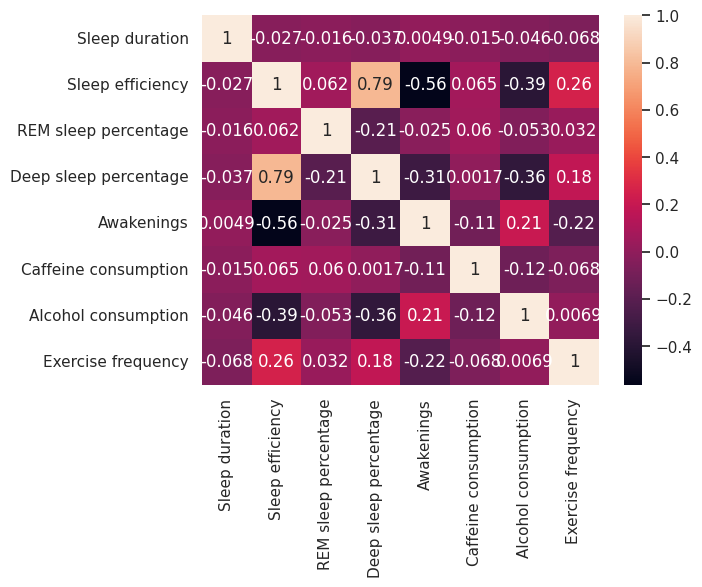

In [361]:
sns.heatmap(cor_matr, annot=True)

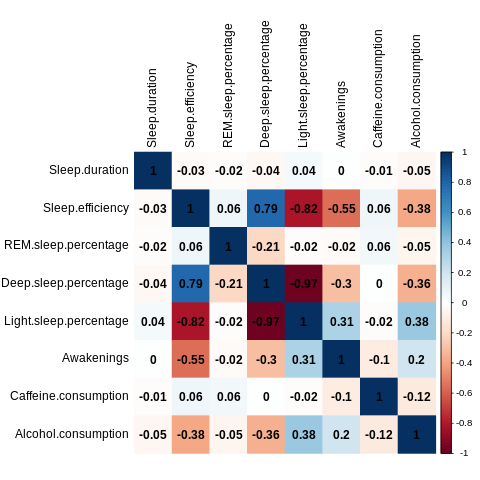

In [362]:
%%R

cor_matr <- df[, 6:13]
for(i in 1:ncol(cor_matr)){
  cor_matr[is.na(cor_matr[,i]), i] <- mean(cor_matr[,i], na.rm = TRUE)
}
cor_matr <- cor(cor_matr)
corrplot(cor_matr, method = 'color', tl.col = "black", addCoef.col = "black")

Корреляция принимает значения из отрезка [-1, 1], где 0 означают слабую корреляцию между данными, 1 - прямую зависимость и -1 - обратную \
По матрице можно сделать весьма логичные предположения, например как эффективность сна тесно связана с глубокими фазами сна, так и не очень очевидные, так что продолжительность сна не зависит от количества пробуждений, в то же время увеличение количества пробуждений влечет за собой ухудшение эффективности сна

In [363]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

filled_df = df.dropna()
matr = add_constant(filled_df.loc[:, notcat])
vif = pd.Series([variance_inflation_factor(matr.values, i) for i in range(matr.shape[1])], index=matr.columns)
vif

const                    197.145056
Sleep duration             1.010541
Sleep efficiency           4.405831
REM sleep percentage       1.208726
Deep sleep percentage      3.436324
Awakenings                 1.611925
Caffeine consumption       1.055205
Alcohol consumption        1.235840
Exercise frequency         1.121965
dtype: float64

In [364]:
%%R

vif_data <- df[, 6:13]
for(i in 1:ncol(vif_data)){
  vif_data[is.na(vif_data[,i]), i] <- mean(vif_data[,i], na.rm = TRUE)
}

vif(lm(Sleep.duration ~ Sleep.efficiency + REM.sleep.percentage + Deep.sleep.percentage + Awakenings + Caffeine.consumption + Alcohol.consumption, data = vif_data))

     Sleep.efficiency  REM.sleep.percentage Deep.sleep.percentage 
             4.428727              1.249386              3.556533 
           Awakenings  Caffeine.consumption   Alcohol.consumption 
             1.592303              1.027171              1.204264 


Здесь пришлось подготовить матрицу, предварительно избавив ее от пропущенных ячеек, так как этот метод чувствителен к их наличию. \
Как видно из таблицы значения Sleep efficiency и Deep sleep percentage более других зависимы от остальных переменных

In [365]:
df['Gender'].value_counts()
print(df[(df['Age'] < 40) & (df['Age'] >= 18)].size)
print(df[df['Age'] >= 40].size)

3135
3510


### Исследовать зависимости в данных с помощью дисперсионного анализа. ###

Нулевой гипотезой в данном случае является предположение, что две и более выборки имеют одинаковое среднее

In [366]:
young = df.loc[df['Age'] < 18, 'Sleep efficiency']
middle = df.loc[(18 <= df['Age']) & (df['Age'] < 40), 'Sleep efficiency']
old = df.loc[(40 <= df['Age']) & (df['Age'] < 70), 'Sleep efficiency']

In [367]:
print(stats.f_oneway(young, middle, old).pvalue > 0.05)
print(young.mean())
print(middle.mean())
print(old.mean())

False
0.588888888888889
0.7882775119617225
0.7971794871794872


In [368]:
%%R

middle <- df[df$Age < 40, ]
old <- df[df$Age >= 40, ]
old <- old[0:218, ]

A <- aov(middle$Sleep.efficiency ~ old$Sleep.efficiency)
anova(A)

Analysis of Variance Table

Response: middle$Sleep.efficiency
                      Df Sum Sq  Mean Sq F value Pr(>F)
old$Sleep.efficiency   1 0.0018 0.001751  0.0883 0.7667
Residuals            216 4.2843 0.019835               


Нулевая гипотеза отвергается, следовательно сделать предположение об эффективности сна в разных возрастных категориях нельзя

### Подогнать регрессионные модели (в том числе, нелинейные) к данным, а также оценить качество подобной аппроксимации. ###

In [369]:
y = df['Sleep efficiency']
spaced_df = pd.get_dummies(df, columns=['Smoking status'], dtype=int)
spaced_df['Alcohol consumption'].fillna(value=df['Alcohol consumption'].mean(), inplace=True)
spaced_df['Exercise frequency'].fillna(value=df['Exercise frequency'].mean(), inplace=True)
X = spaced_df[['Alcohol consumption', 'Exercise frequency', 'Smoking status_No', 'Smoking status_Yes']]

model = stm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep efficiency   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     57.67
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.53e-31
Time:                        19:47:43   Log-Likelihood:                 337.27
No. Observations:                 452   AIC:                            -666.5
Df Residuals:                     448   BIC:                            -650.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Alcohol consumption    -0.0311      0.003     -9.114      0.000      -0.038      -0.024
Exercise frequency      0.0239      0.004      6.230      0.000       0.016       0.031
Smoking status_No       0.8072      0.010     78.002      0.000       0.787       0.828
Smoking status_Yes      0.7351      0.012     60.147      0.000       0.711       0.759
==============================================================================
Omnibus:                       16.987   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.774
Skew:                          -0.342   Prob(JB):                      0.00102
Kurtosis:                       2.487   Cond. No.                         7.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [370]:
model.mse_model

0.7660090365771156

In [371]:
%%R

spaced_df <- df[, -14]
spaced_df$Smoking.status_Yes <- ifelse(df$Smoking.status == 'Yes', 1, 0)
spaced_df$Smoking.status_No <- ifelse(df$Smoking.status == 'No', 1, 0)
for(i in 1:ncol(spaced_df)){
  spaced_df[is.na(spaced_df[,i]), i] <- mean(spaced_df[,i], na.rm = TRUE)
}

model <- lm(spaced_df$Sleep.efficiency ~ spaced_df$Alcohol.consumption + spaced_df$Exercise.frequency + spaced_df$Smoking.status_No + spaced_df$Smoking.status_Yes)
summary(model)


Call:
lm(formula = spaced_df$Sleep.efficiency ~ spaced_df$Alcohol.consumption + 
    spaced_df$Exercise.frequency + spaced_df$Smoking.status_No + 
    spaced_df$Smoking.status_Yes)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28721 -0.08020  0.01386  0.08564  0.27254 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.735132   0.012222  60.147  < 2e-16 ***
spaced_df$Alcohol.consumption -0.031077   0.003410  -9.114  < 2e-16 ***
spaced_df$Exercise.frequency   0.023854   0.003829   6.230 1.08e-09 ***
spaced_df$Smoking.status_No    0.072077   0.011478   6.279 8.04e-10 ***
spaced_df$Smoking.status_Yes         NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1152 on 448 degrees of freedom
Multiple R-squared:  0.2786,	Adjusted R-squared:  0.2738 
F-statistic: 57.67 on 3 and 448 DF,  p-val

Вид линейной модели следующий
$$y_{\text{Sleep efficiency}} = x_{\text{Alcohol consumption}} \cdot (-0.0311) + x_{\text{Exercise frequency}} \cdot (0.0239) + x_{\text{Smoking status No}} \cdot (0.8072) + x_{\text{Smoking status Yes}} \cdot (0.7351)$$

In [372]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=3)
df['Caffeine consumption'].fillna(value=df['Caffeine consumption'].mean(), inplace=True)
Xp = df.loc[:, 'Caffeine consumption'].to_numpy().reshape(-1, 1)
Xp = polynomial_features.fit_transform(Xp)

model = stm.OLS(y, Xp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep efficiency   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.398
Date:                Mon, 27 Nov 2023   Prob (F-statistic):              0.243
Time:                        19:47:43   Log-Likelihood:                 265.57
No. Observations:                 452   AIC:                            -523.1
Df Residuals:                     448   BIC:                            -506.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7886      0.009     85.483      0.000       0.771       0.807
x1            -0.0010      0.001     -1.050      0.294      -0.003       0.001
x2          2.578e-05   2.13e-05      1.209      0.227   -1.61e-05    6.77e-05
x3         -9.071e-08   8.48e-08     -1.070      0.285   -2.57e-07    7.59e-08
==============================================================================
Omnibus:                       48.387   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.134
Skew:                          -0.655   Prob(JB):                     1.17e-09
Kurtosis:                       2.315   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
model.mse_model

0.025494550107378444

In [374]:
%%R

poly <- lm(formula = spaced_df$Caffeine.consumption ~ poly(spaced_df$Caffeine.consumption, degree = 3, raw = T))
summary(poly)


Call:
lm(formula = spaced_df$Caffeine.consumption ~ poly(spaced_df$Caffeine.consumption, 
    degree = 3, raw = T))

Residuals:
       Min         1Q     Median         3Q        Max 
-3.655e-13  3.300e-16  6.800e-16  1.500e-15  3.408e-14 

Coefficients:
                                                             Estimate
(Intercept)                                                -8.021e-15
poly(spaced_df$Caffeine.consumption, degree = 3, raw = T)1  1.000e+00
poly(spaced_df$Caffeine.consumption, degree = 3, raw = T)2 -2.147e-18
poly(spaced_df$Caffeine.consumption, degree = 3, raw = T)3  7.327e-21
                                                           Std. Error
(Intercept)                                                 1.187e-15
poly(spaced_df$Caffeine.consumption, degree = 3, raw = T)1  1.274e-16
poly(spaced_df$Caffeine.consumption, degree = 3, raw = T)2  2.744e-18
poly(spaced_df$Caffeine.consumption, degree = 3, raw = T)3  1.091e-20
                                            

Вид полиномиальной модели следующий:
$$ y_{\text{Sleep efficiency}} = x \cdot (0.0247) + x^2 \cdot (2.578 \cdot 10^{-5}) + x^3*(-9.071 \cdot 10^{-8}) + 0.7886 $$